# IMPORTING USEFUL LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# READING CSV FILE

In [3]:
data=pd.read_csv('/Users/jangrzybek/Downloads/Customer_Behaviour.csv')

In [4]:
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


# BASIC INFORMATIONS ABOUT DATASET

In [50]:
data.shape

(400, 5)

In [51]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

### The dataset has 400 rows and 5 columns. Columns are string and int type.

# RENAMING COLUMNS NAMES

In [52]:
data.drop('User ID',axis='columns',inplace=True)

In [53]:
data.rename(columns={'Gender':'gender', 'Age':'age', 'EstimatedSalary':'estimated_salary', 'Purchased':'purchased'
},inplace=True)
data.columns

Index(['gender', 'age', 'estimated_salary', 'purchased'], dtype='object')

# LOOKING FOR NAN VALUES 

In [54]:
data.isnull().sum()

gender              0
age                 0
estimated_salary    0
purchased           0
dtype: int64

### There are no Nan values in dataset.

# STATISTICS 

### 1) age

In [55]:
data['age'].describe()

count    400.000000
mean      37.655000
std       10.482877
min       18.000000
25%       29.750000
50%       37.000000
75%       46.000000
max       60.000000
Name: age, dtype: float64

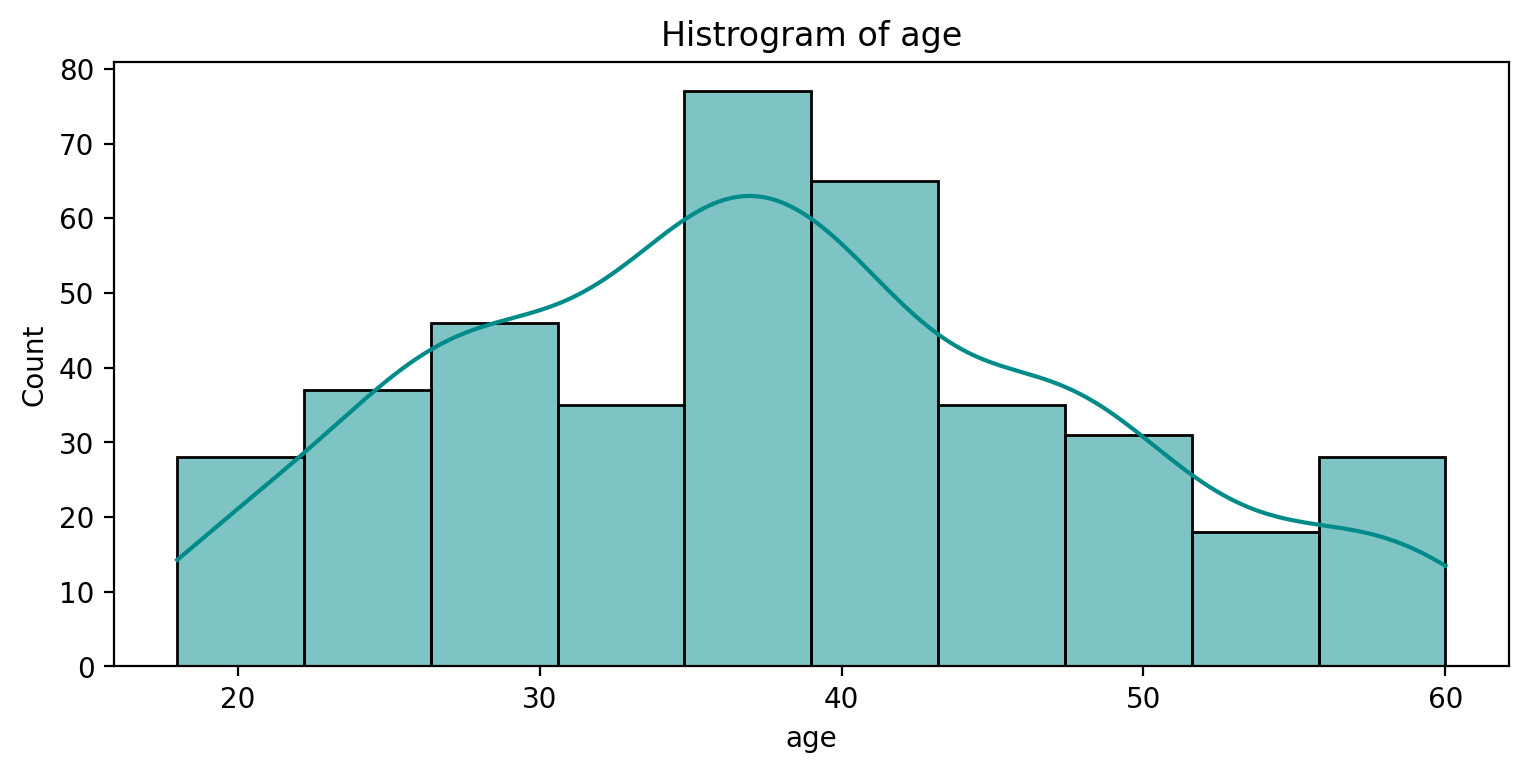

In [56]:
plt.figure(figsize=(9,4), dpi=200)
sns.histplot(data=data, x="age", kde=True, bins=10, color='darkcyan')
plt.title('Histrogram of age')
plt.show()

### 2) estimated salary

In [57]:
data['estimated_salary'].describe()

count       400.000000
mean      69742.500000
std       34096.960282
min       15000.000000
25%       43000.000000
50%       70000.000000
75%       88000.000000
max      150000.000000
Name: estimated_salary, dtype: float64

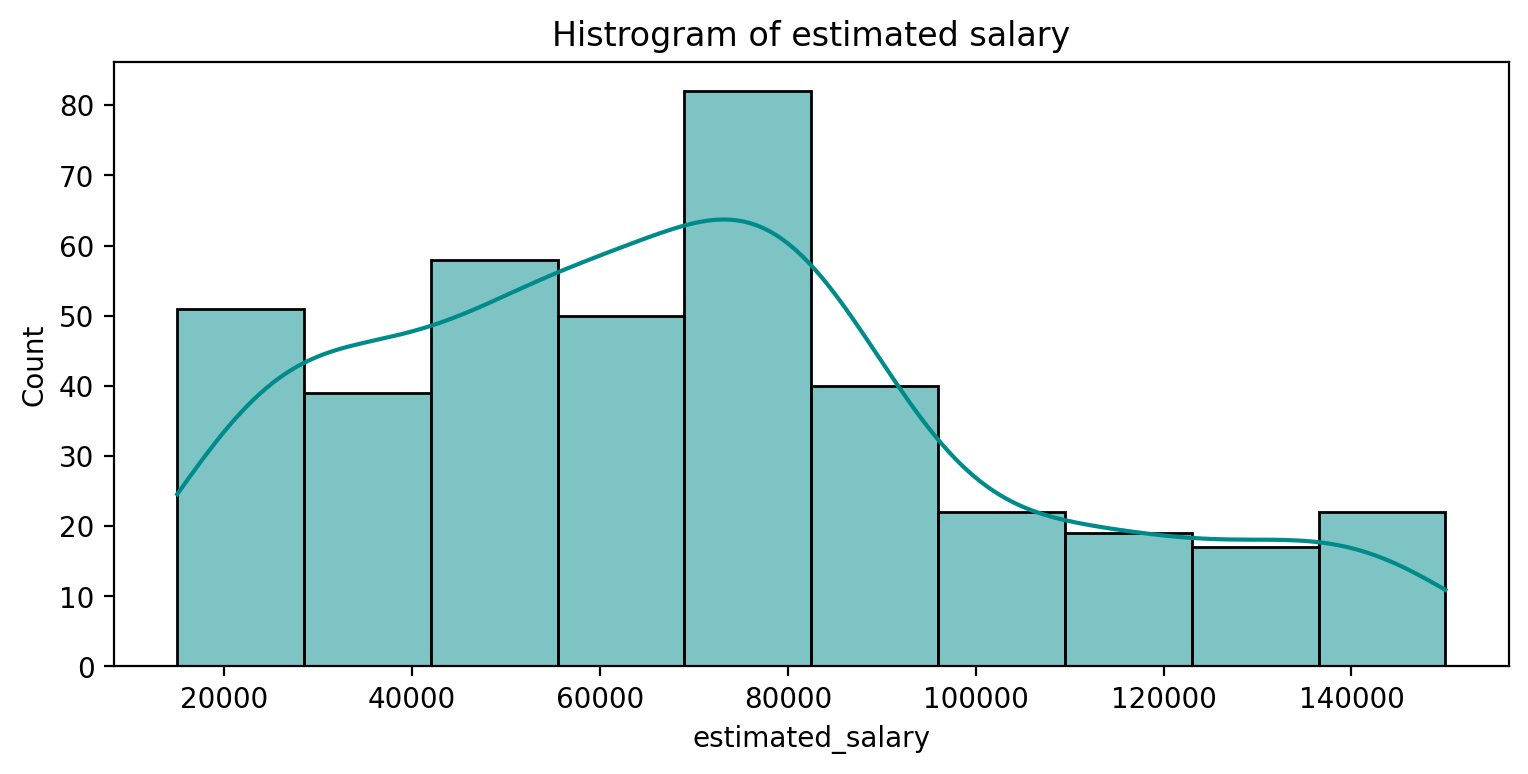

In [58]:
plt.figure(figsize=(9,4), dpi=200)
sns.histplot(data=data, x="estimated_salary", kde=True, bins=10, color='darkcyan')
plt.title('Histrogram of estimated salary')
plt.show()

### 3) gender

In [59]:
data['gender'].describe()

count        400
unique         2
top       Female
freq         204
Name: gender, dtype: object

In [60]:
gender_value_counts=data['gender'].value_counts()

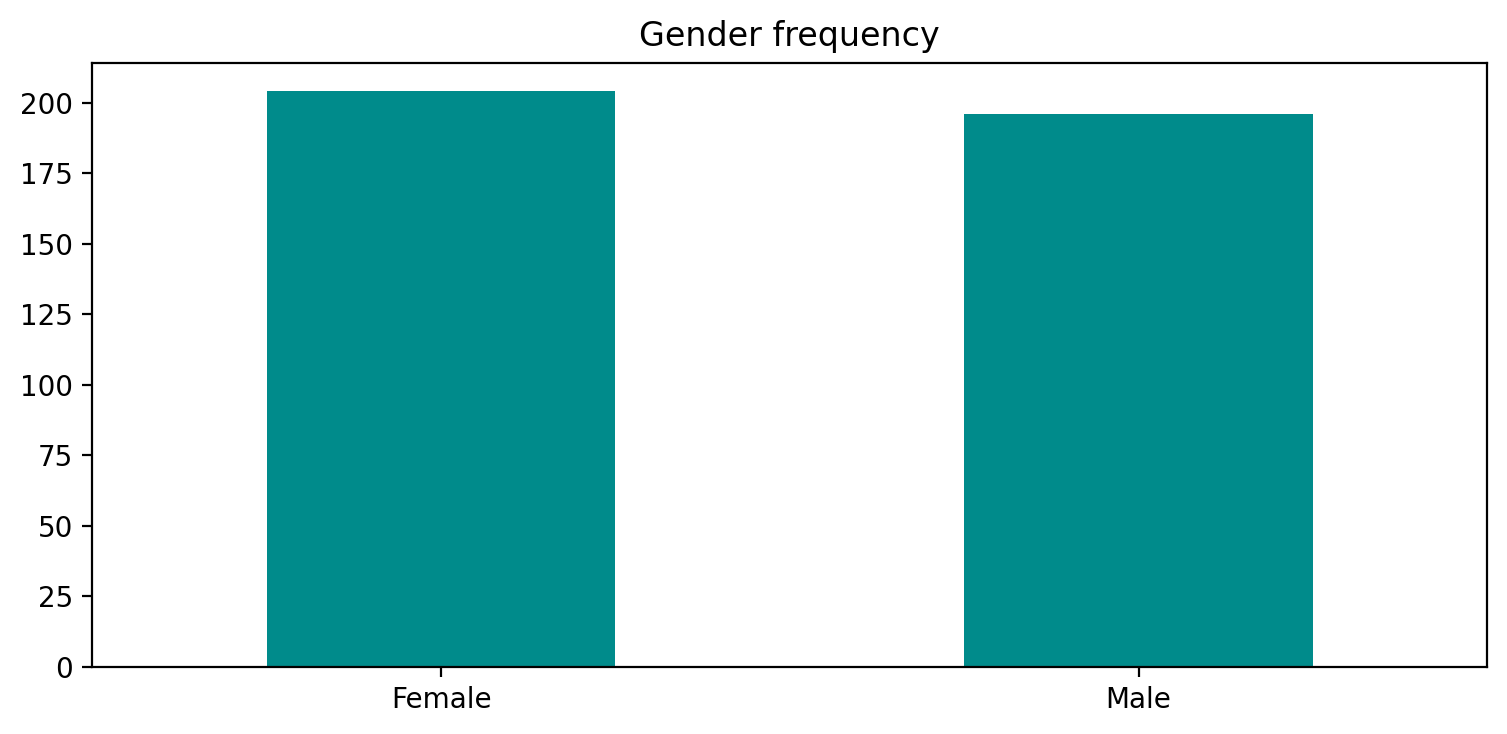

In [61]:
plt.figure(figsize=(9,4), dpi=200)
gender_value_counts.plot(kind='bar', color='darkcyan')
plt.xticks(rotation =0)
plt.title('Gender frequency')
plt.show()

### 4) purchased

In [62]:
purchased_value_counts=data['purchased'].value_counts()
purchased_value_counts

0    257
1    143
Name: purchased, dtype: int64

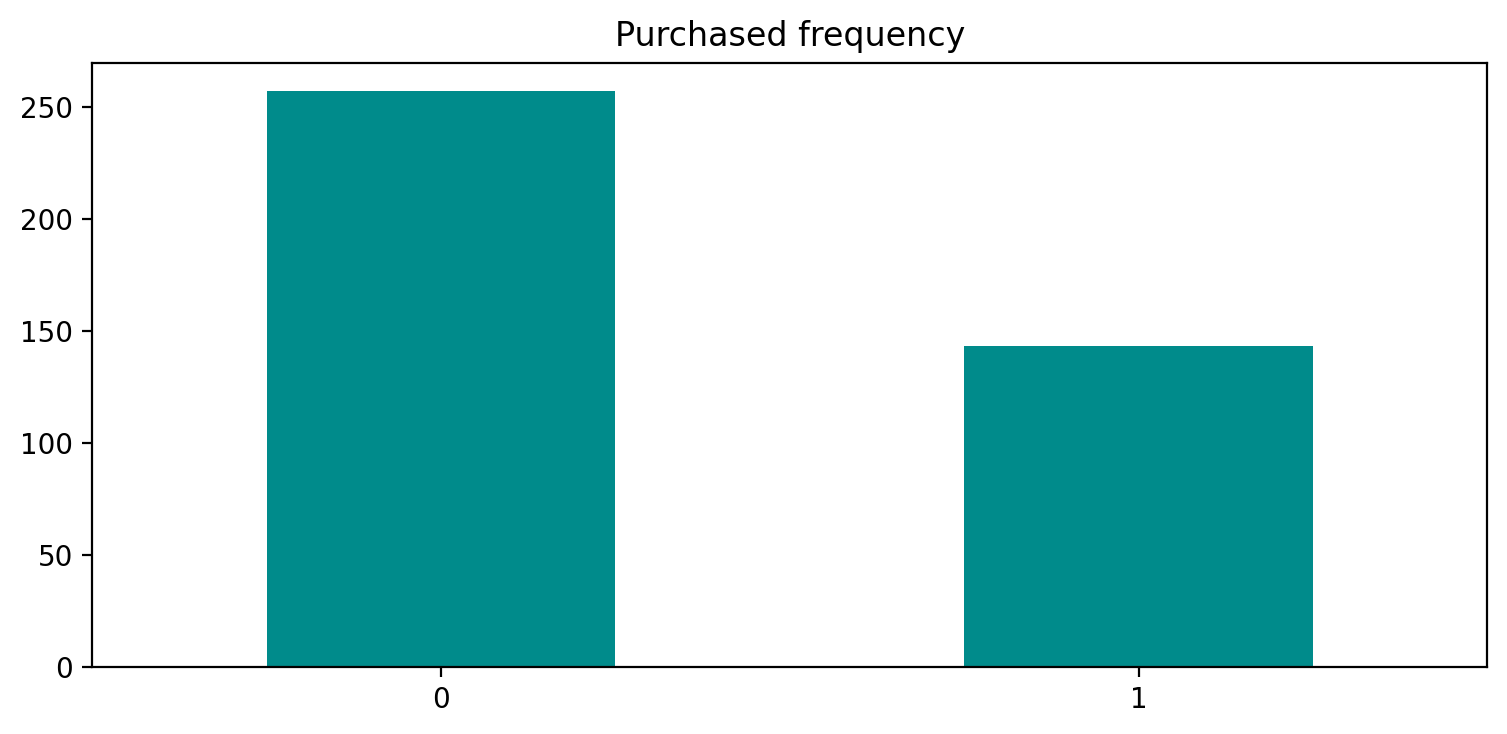

In [63]:
plt.figure(figsize=(9,4), dpi=200)
purchased_value_counts.plot(kind='bar', color='darkcyan')
plt.xticks(rotation =0)
plt.title('Purchased frequency')
plt.show()

# Correlation matrix

### Checking correlation beetwen numeric independant variables

In [64]:
corelations_numeric_independant_variables=data[['age','estimated_salary']].corr()
corelations_numeric_independant_variables

,age,estimated_salary
age,1.000000,0.155238
estimated_salary,0.155238,1.000000


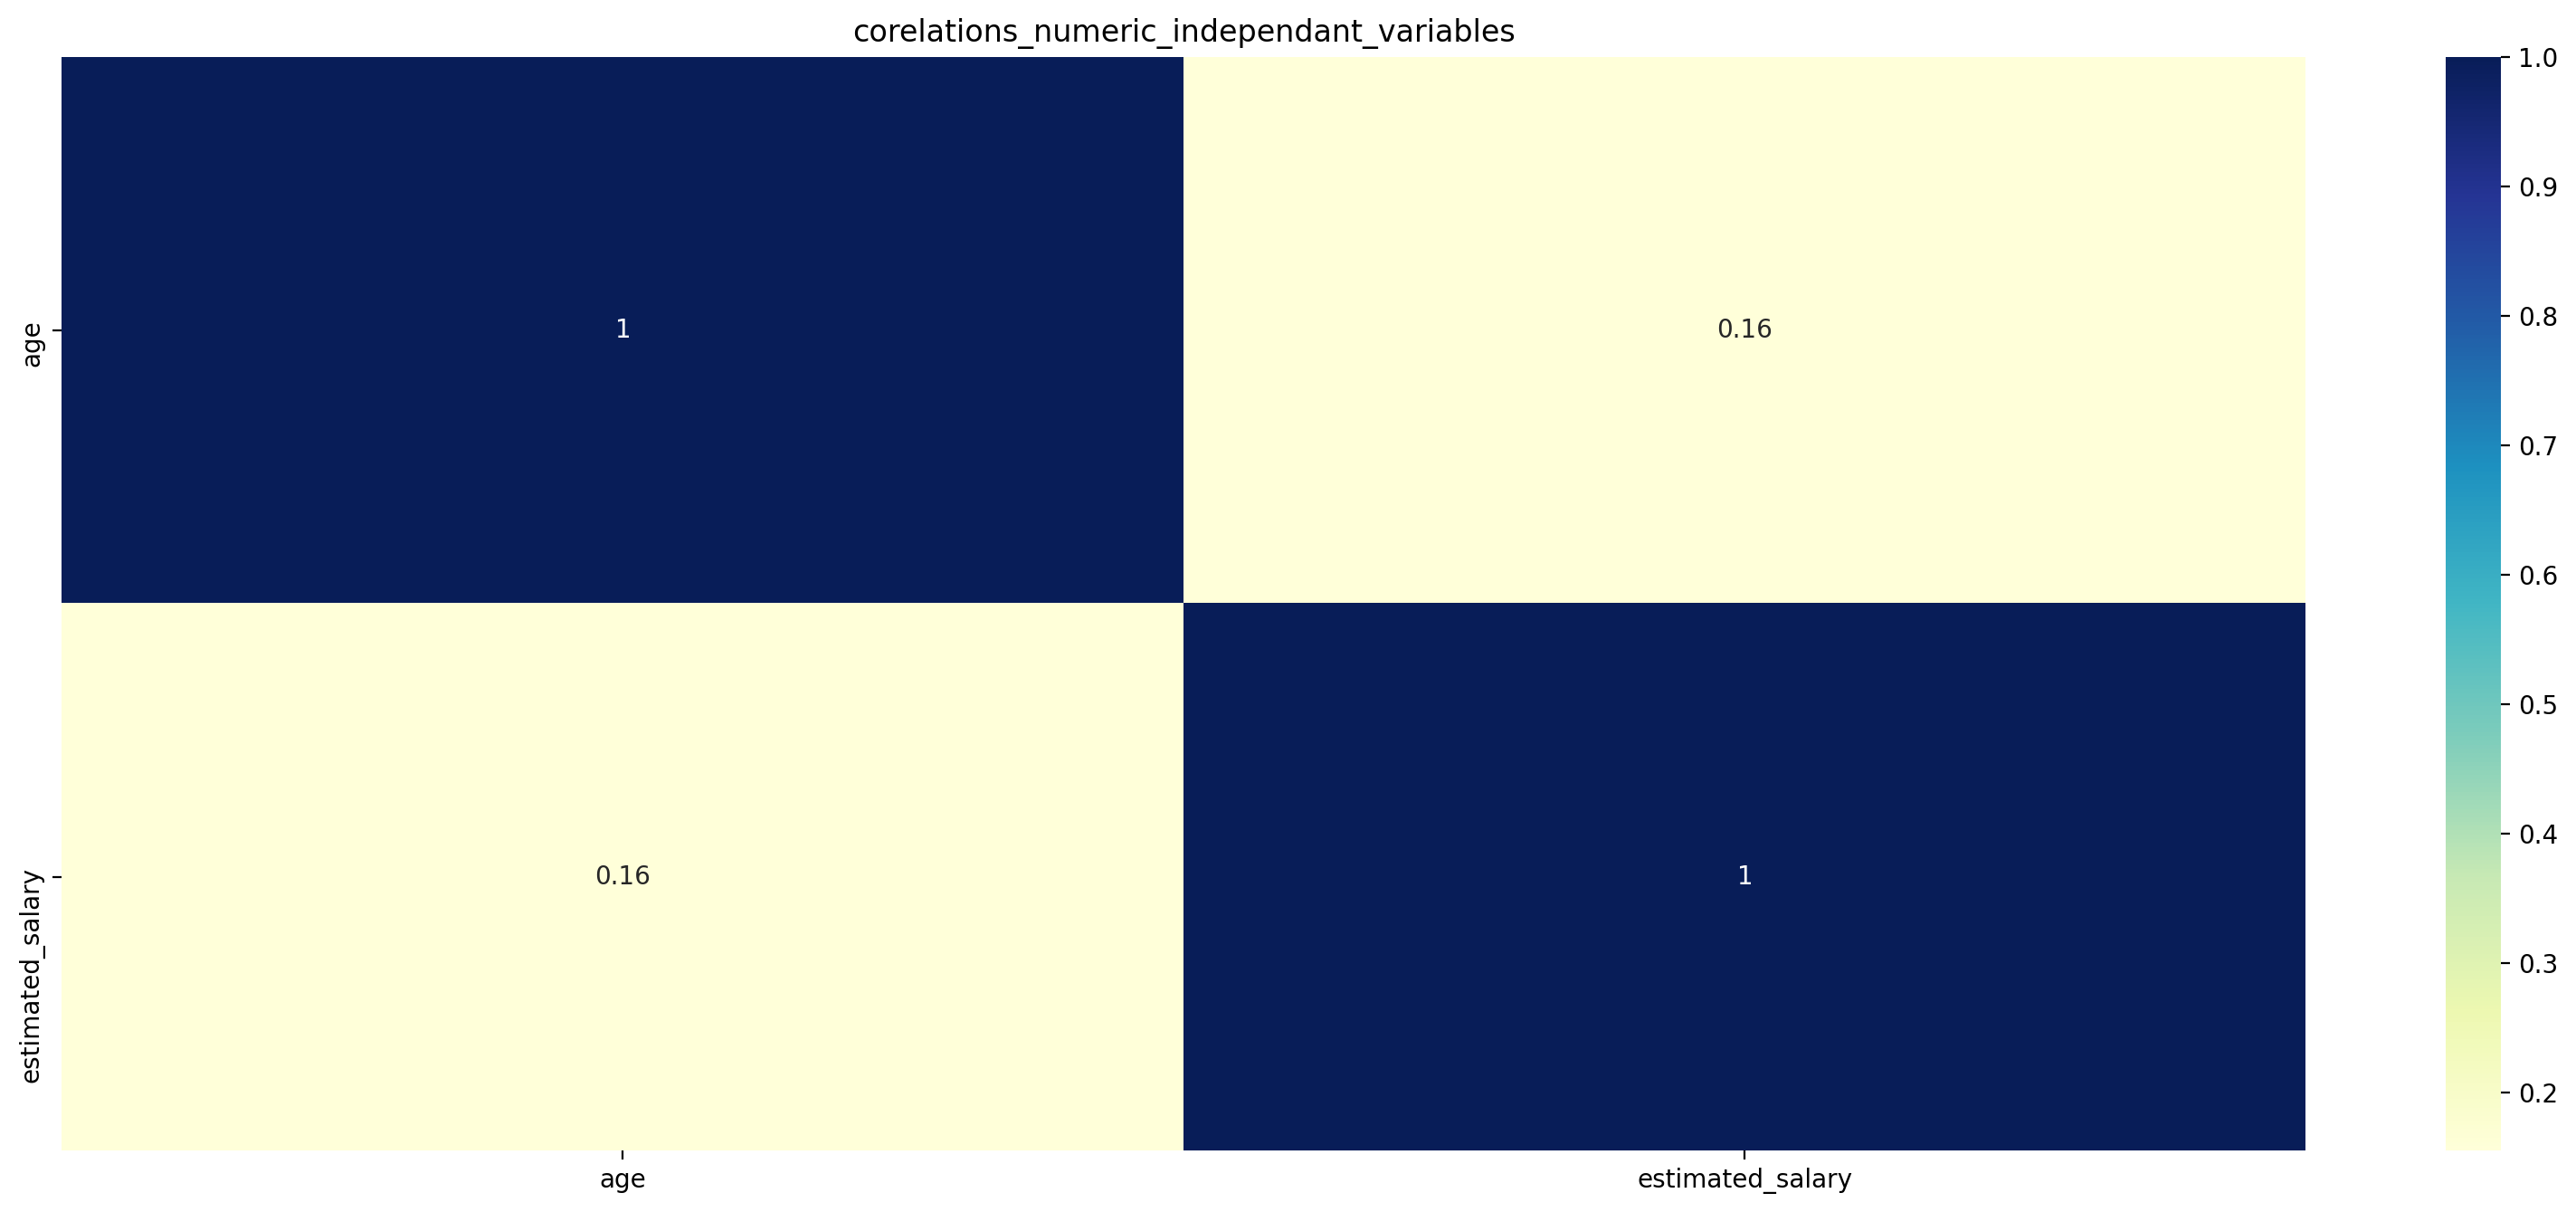

In [65]:
plt.figure(figsize=(20,8),dpi=200)
sns.heatmap(corelations_numeric_independant_variables, cmap="YlGnBu", annot=True)
plt.title('corelations_numeric_independant_variables')
plt.show()

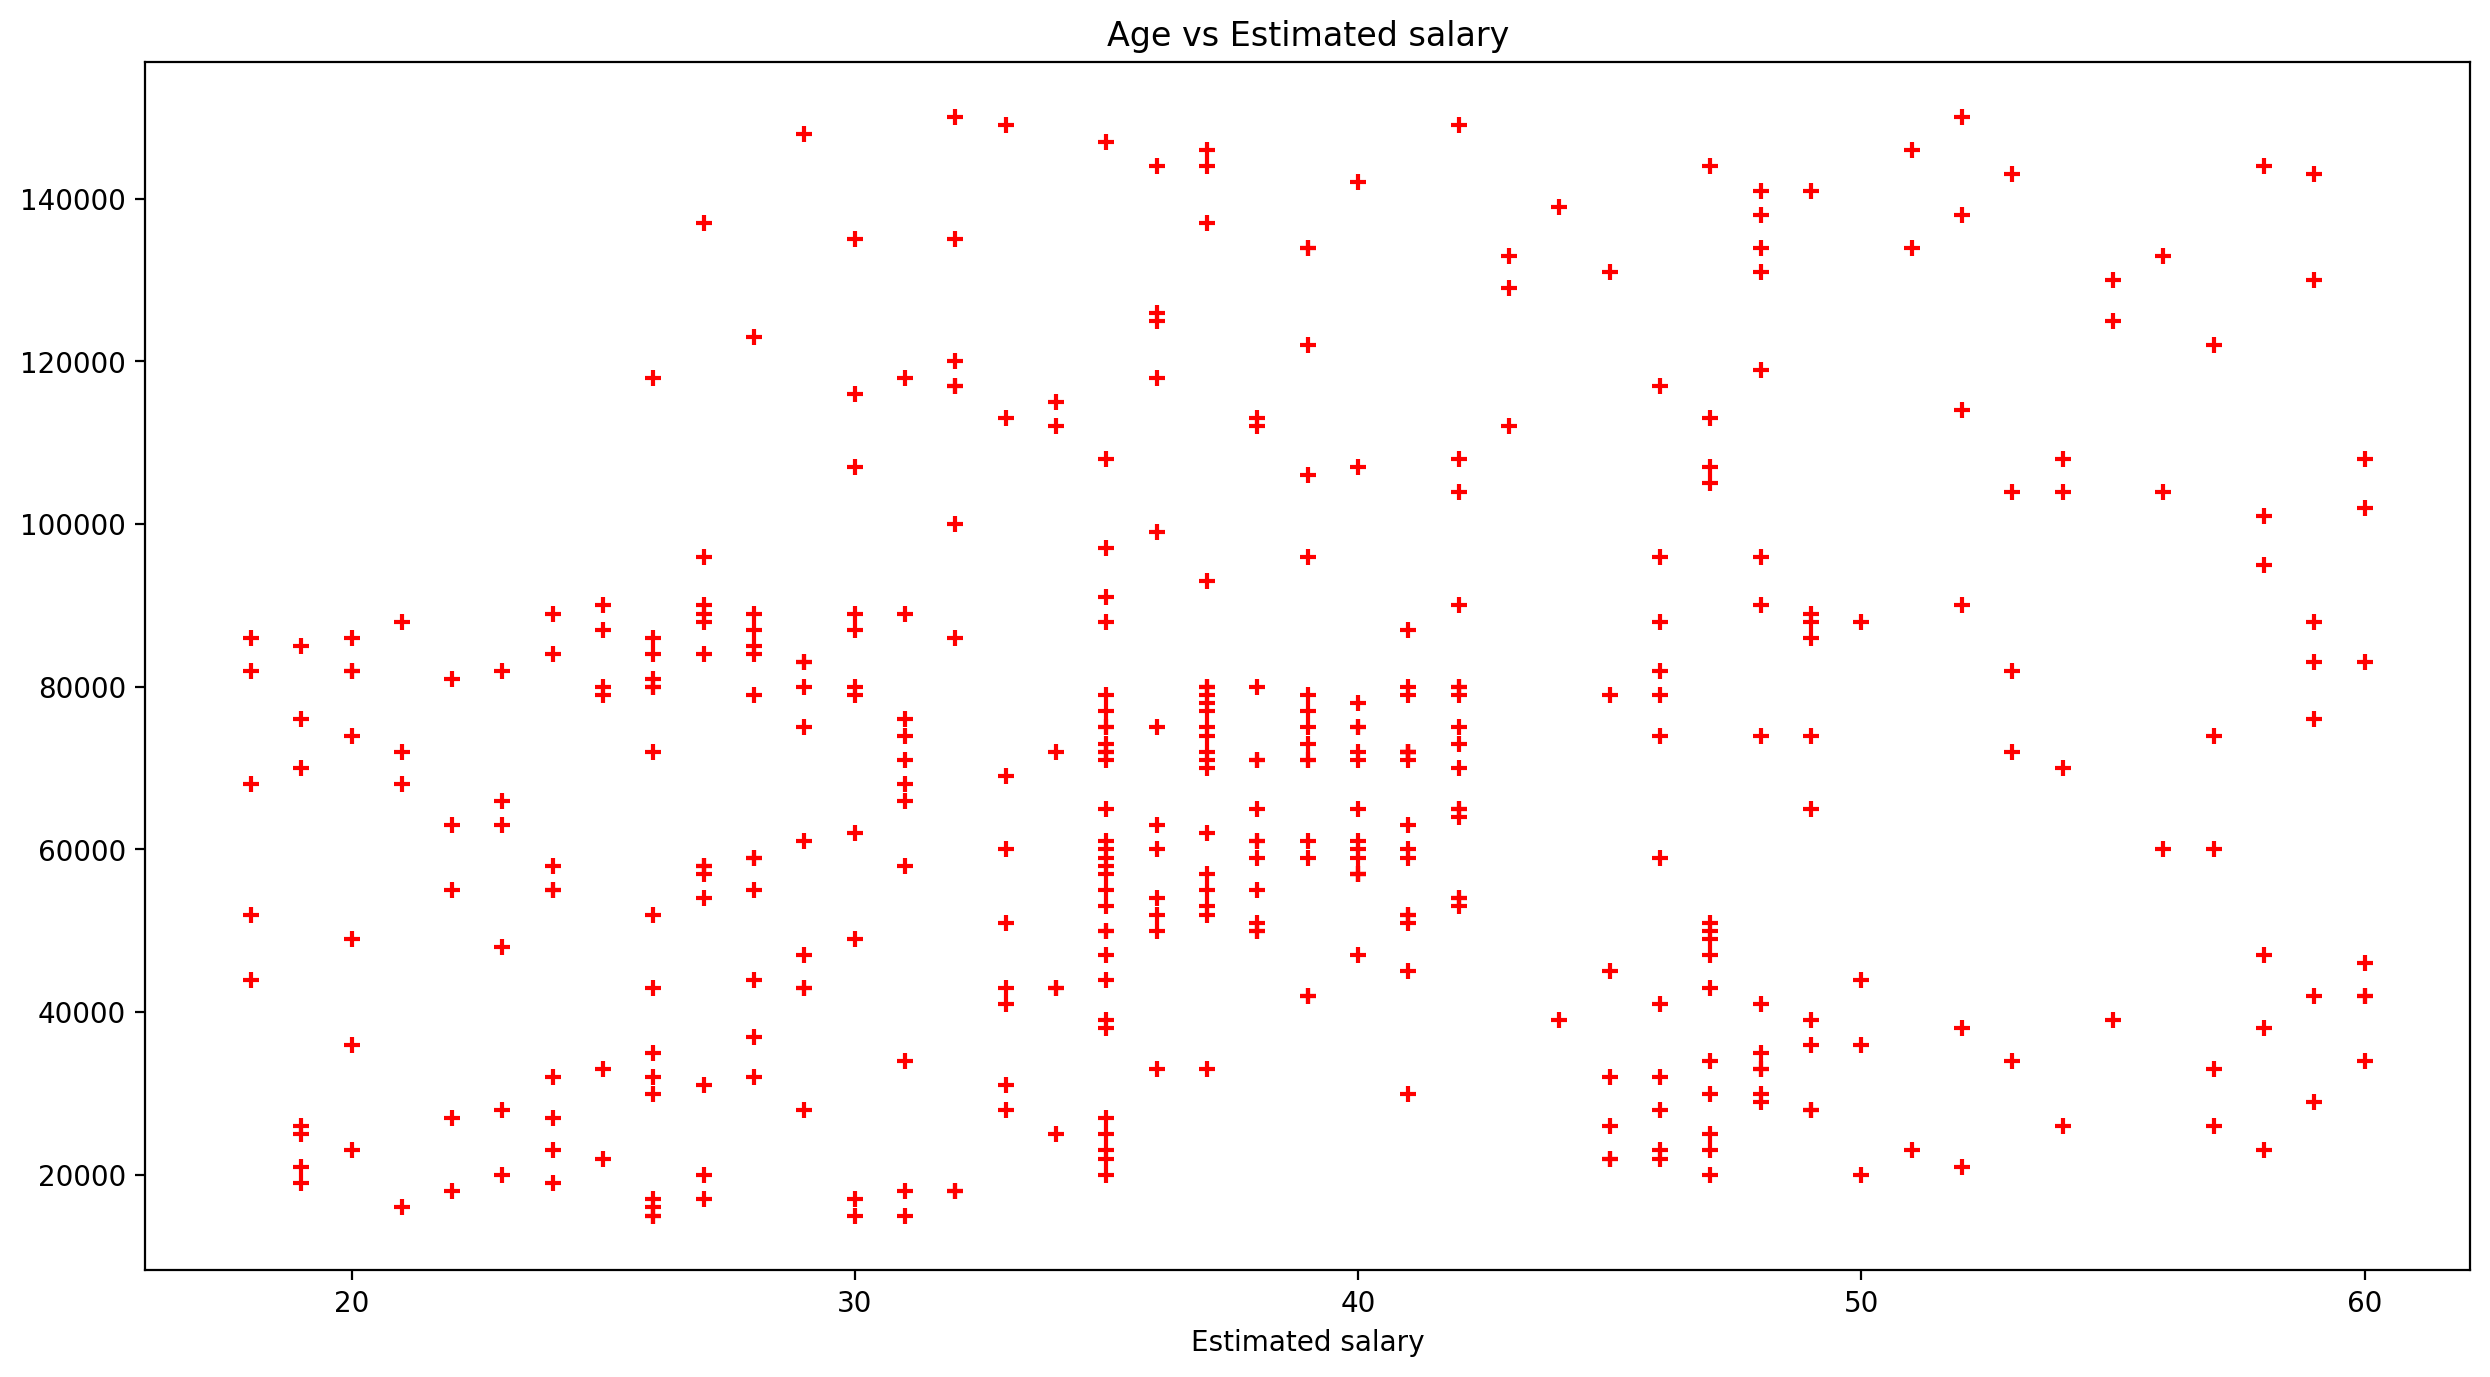

In [66]:
plt.figure(figsize=(15,8),dpi=200)
plt.scatter(data['age'],data['estimated_salary'],color='red',marker='+')
plt.title('Age vs Estimated salary')
plt.xlabel('Age')
plt.xlabel('Estimated salary')
plt.show()

### There is no multicollinearity beetwen numeric independant variables. 

# Label encoding

In [67]:
data_copied=data.copy()

In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
le=LabelEncoder()

In [70]:
data_copied['gender_encoded']=le.fit_transform(data_copied['gender'])

In [71]:
data_copied.drop('gender',axis='columns', inplace=True)

In [72]:
data_copied.head()

,age,estimated_salary,purchased,gender_encoded
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [73]:
X=data_copied.drop('purchased',axis='columns')
y=data_copied['purchased']

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [76]:
X_train

,age,estimated_salary,gender_encoded
3,27,57000,0
18,46,28000,1
202,39,134000,0
250,44,39000,0
274,57,26000,0
...,...,...,...
71,24,27000,0
106,26,35000,0
270,43,133000,0
348,39,77000,1


In [77]:
y_train

3      0
18     1
202    1
250    0
274    1
      ..
71     0
106    0
270    0
348    0
102    0
Name: purchased, Length: 320, dtype: int64

# Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
logistic_regression=LogisticRegression()

In [80]:
logistic_regression.fit(X_train,y_train)

LogisticRegression()

In [81]:
logistic_regression_train_score=round(logistic_regression.score(X_train,y_train),2)
print('Logistic regression train set score:',logistic_regression_train_score)

Logistic regression train set score: 0.64


In [82]:
logistic_regression_test_score=round(logistic_regression.score(X_test,y_test),2)
print('Logistic regression test set score:', logistic_regression_test_score)

Logistic regression test set score: 0.65


### Logistic Regression confusion matrix

In [83]:
logistic_regression_predicted=logistic_regression.predict(X_test)
logistic_regression_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [84]:
np.array(y_test)

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1])

In [85]:
from sklearn import metrics
confusion_matrix_logistic_regression = metrics.confusion_matrix(y_true=y_test,y_pred=logistic_regression_predicted,labels=(0,1))
confusion_matrix_logistic_regression

array([[52,  0],
       [28,  0]])

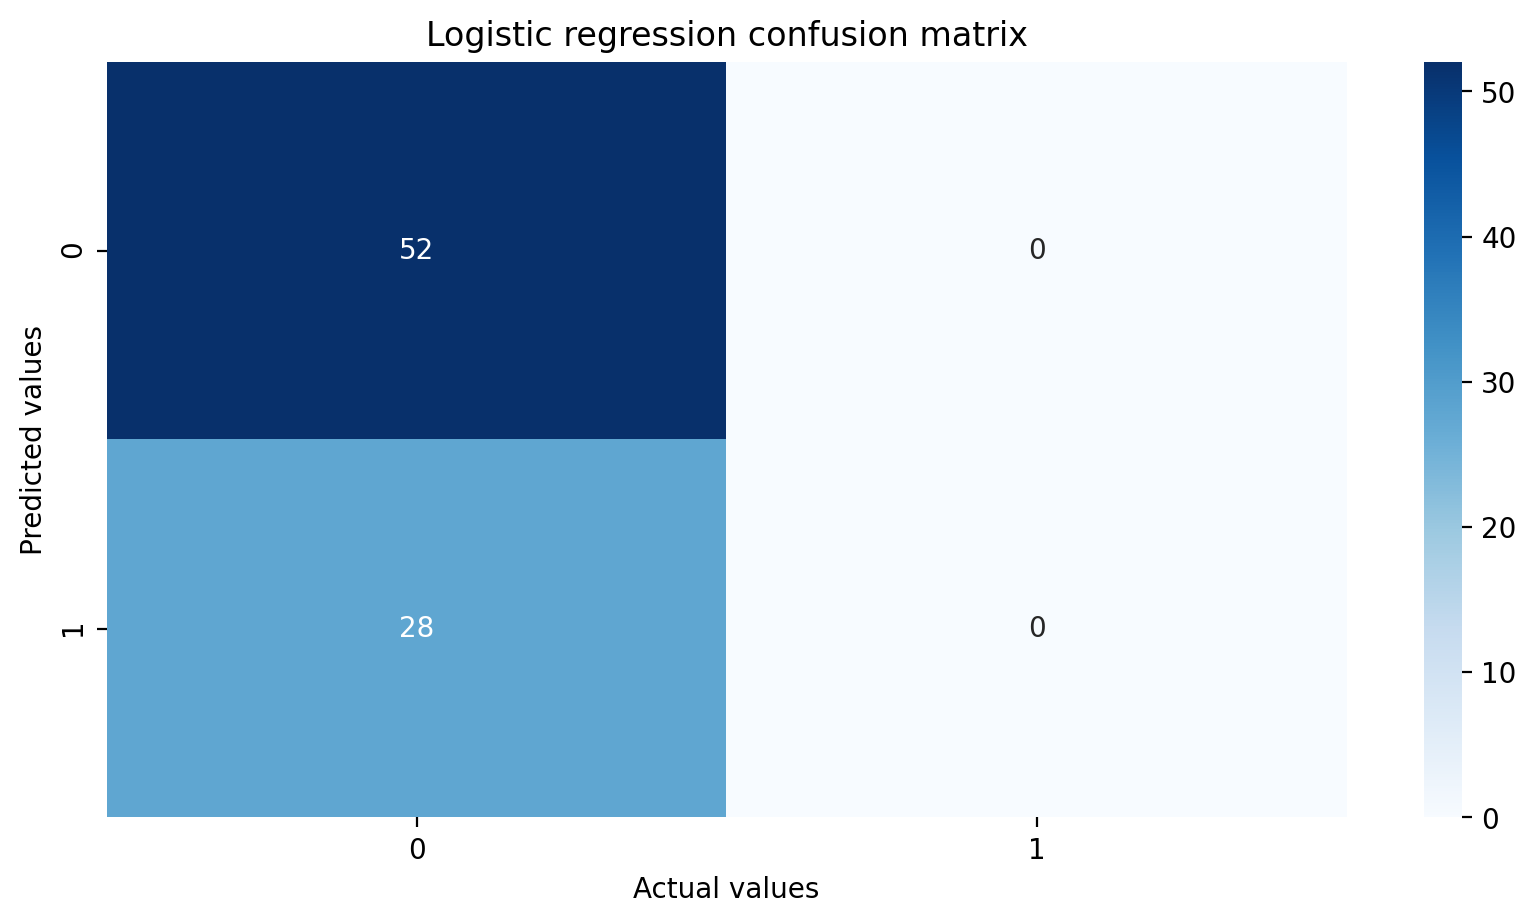

In [86]:
plt.figure(figsize=(10,5),dpi=200)
sns.heatmap(confusion_matrix_logistic_regression, annot=True, cmap='Blues')
plt.title('Logistic regression confusion matrix')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

# Decision Tree

In [87]:
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV

### Hyperparameter tuning

In [88]:
decision_tree=tree.DecisionTreeClassifier(random_state=24)

In [89]:
hyperparameter_space_decision_tree= {
    'criterion':['gini','entropy'],
    'max_features':[1,2,3],
    'max_depth':[2,4,6,8,10,12,14],
    'min_samples_split':[2,3,4,6,7,8,9,10,12,14],
    'min_samples_leaf':[2,4,6,8,10,12,14]
     }

In [90]:
random_search_decision_tree= RandomizedSearchCV(estimator=decision_tree,
                                     param_distributions=hyperparameter_space_decision_tree,
                                     n_iter=500,
                                     cv=5,
                                     scoring="accuracy",
                                     random_state=90,
                                     n_jobs=-1,
                                     verbose=1)
 

random_search_decision_tree.fit(X_train,y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=24),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4, 6, 8, 10, 12, 14],
                                        'max_features': [1, 2, 3],
                                        'min_samples_leaf': [2, 4, 6, 8, 10, 12,
                                                             14],
                                        'min_samples_split': [2, 3, 4, 6, 7, 8,
                                                              9, 10, 12, 14]},
                   random_state=90, scoring='accuracy', verbose=1)

In [91]:
random_search_decision_tree.best_params_

{'min_samples_split': 14,
 'min_samples_leaf': 6,
 'max_features': 3,
 'max_depth': 4,
 'criterion': 'entropy'}

In [92]:
random_search_decision_tree.best_score_

0.9125

### Building decision tree with best random search cv params

In [93]:
decision_tree_best_params=tree.DecisionTreeClassifier(criterion='entropy',
                                                      max_depth=4,
                                                      max_features=3,
                                                      min_samples_leaf=6,
                                                      min_samples_split=14,
                                                      random_state=1)

In [94]:
decision_tree_best_params.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=3,
                       min_samples_leaf=6, min_samples_split=14,
                       random_state=1)

In [95]:
decision_tree_best_params_train_score=round(decision_tree_best_params.score(X_train,y_train),2)
print('Decision tree train set score:', decision_tree_best_params_train_score)

Decision tree train set score: 0.92


In [96]:
decision_tree_best_params_test_score=round(decision_tree_best_params.score(X_test,y_test),2)
print('Decision tree train set score:', decision_tree_best_params_test_score)

Decision tree train set score: 0.9


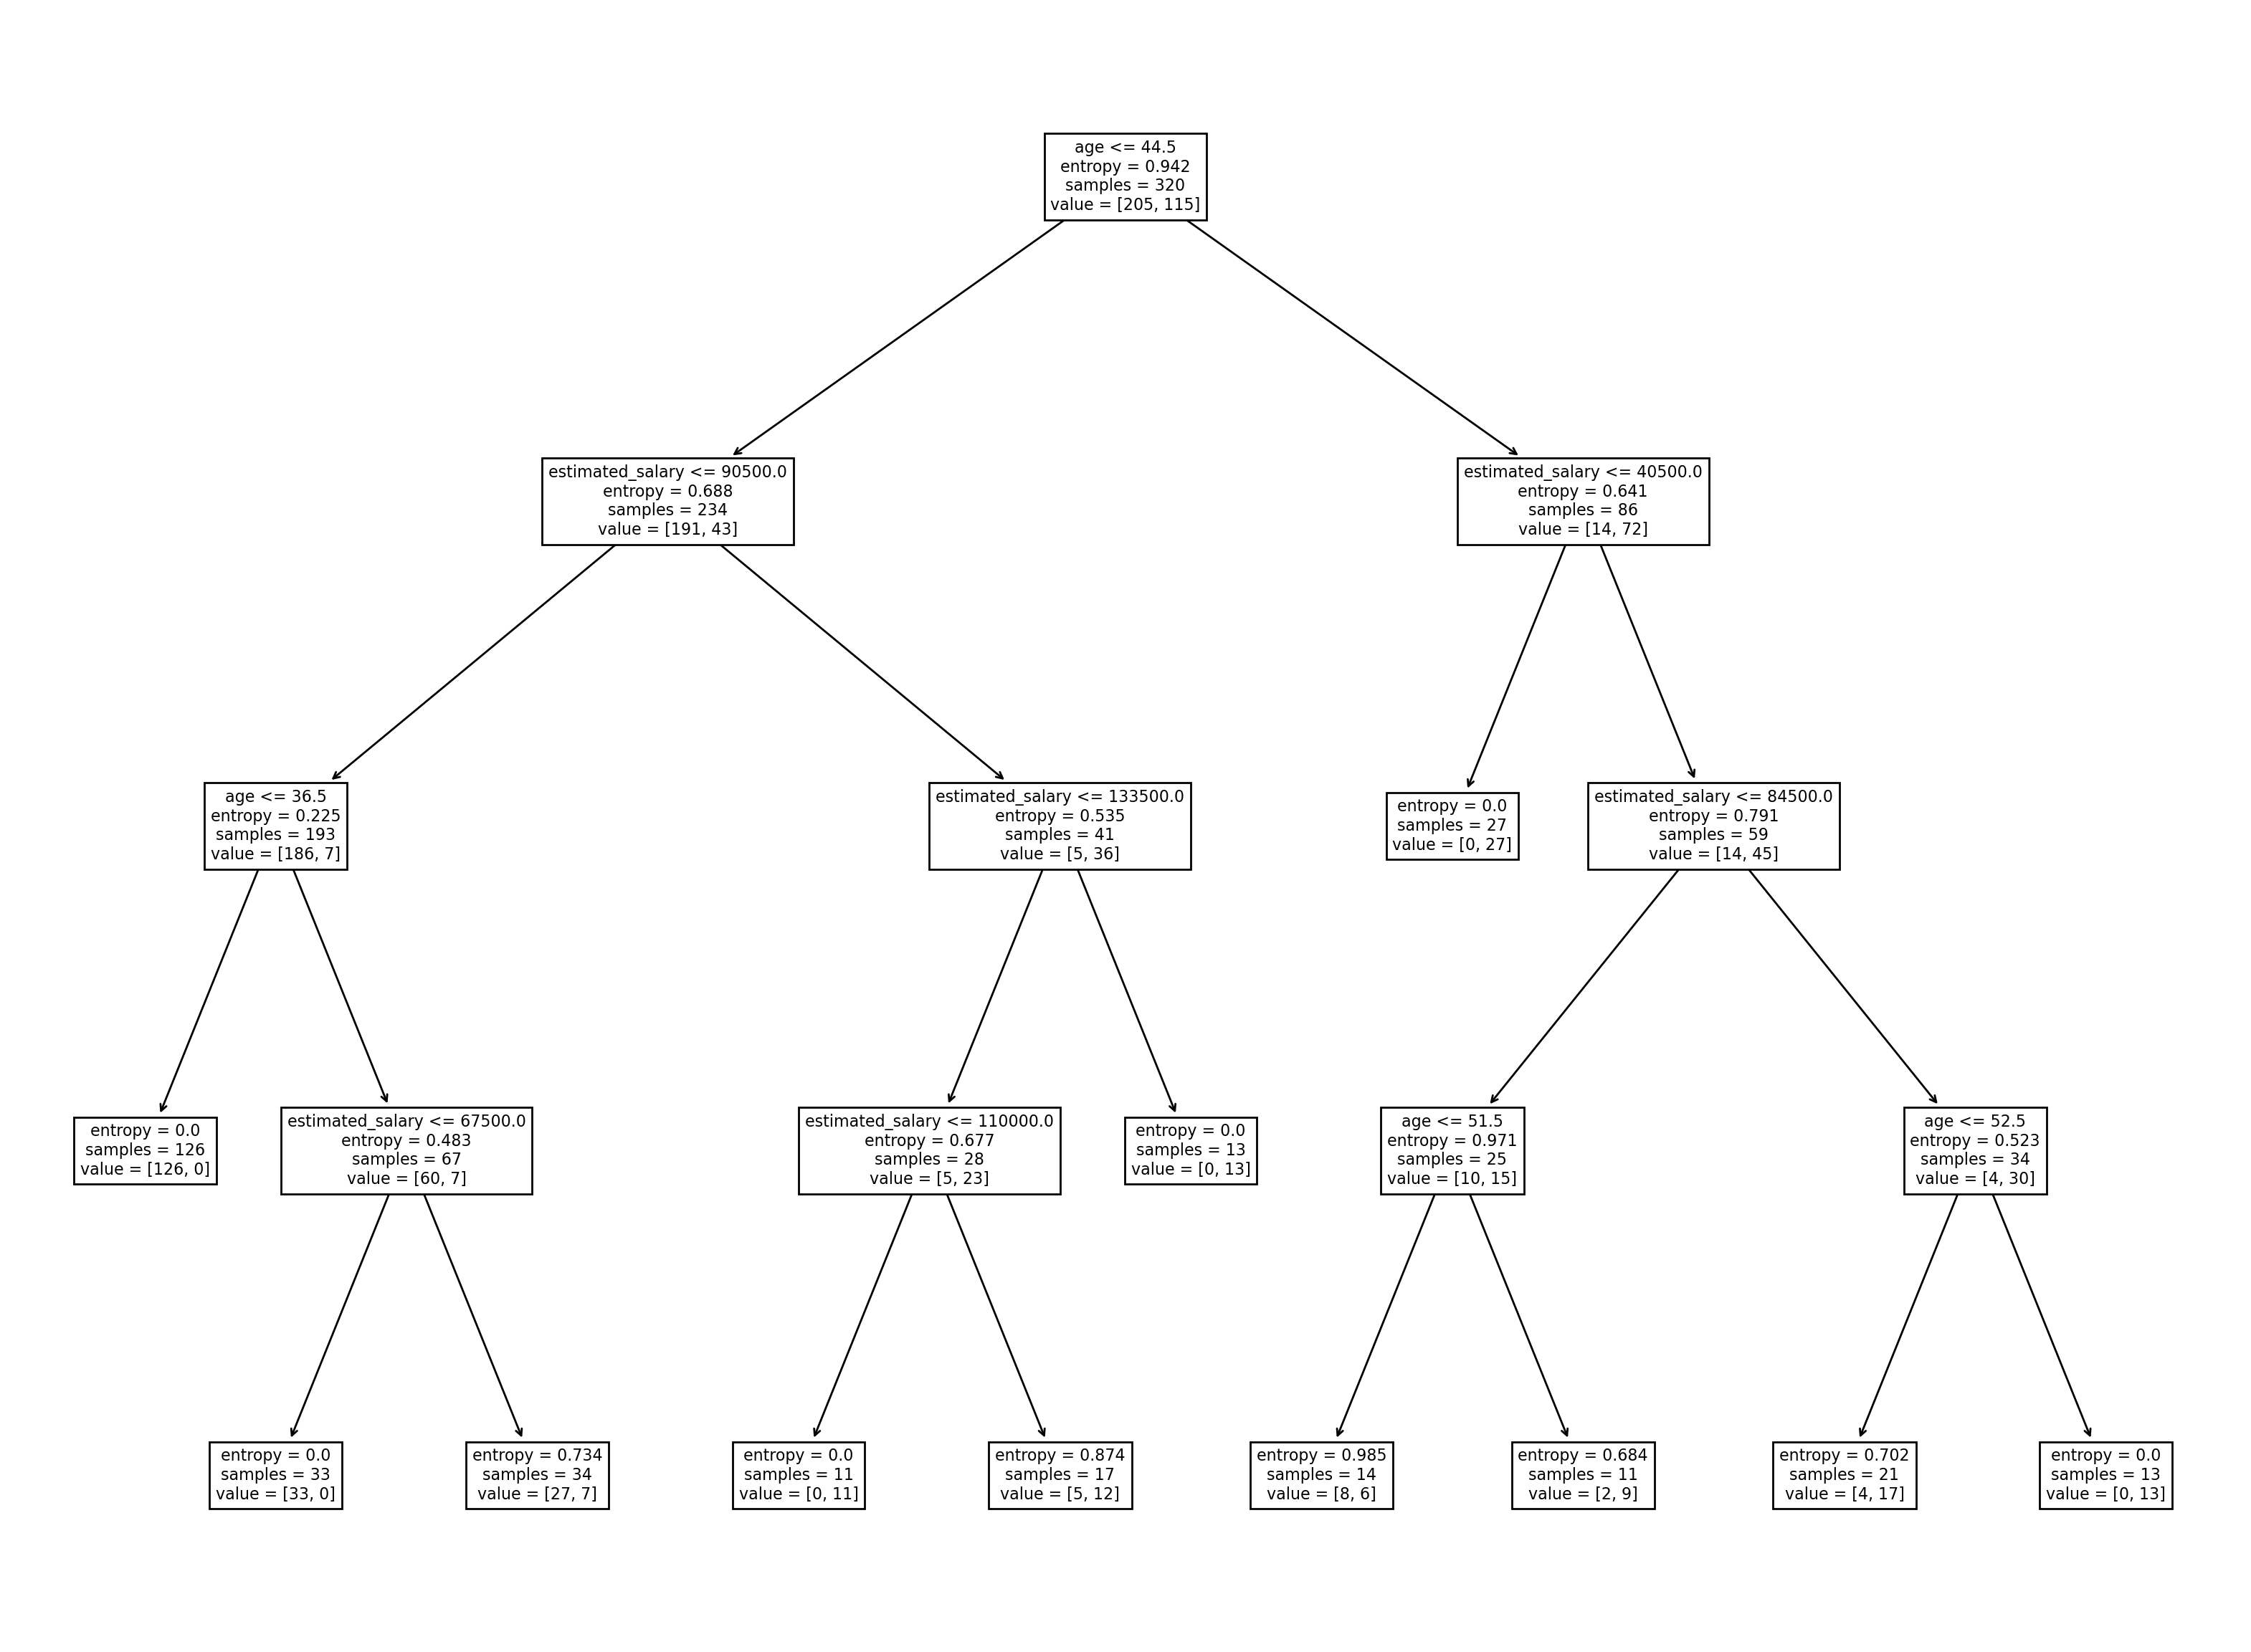

In [97]:
plt.figure(figsize=(20,15),dpi=200)
tree.plot_tree(decision_tree_best_params,feature_names=X_train.columns)
plt.show()

### Decision tree confusion matrix

In [98]:
decision_tree_predicted=decision_tree_best_params.predict(X_test)
decision_tree_predicted

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [99]:
np.array(y_test)

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1])

In [100]:
from sklearn import metrics
confusion_matrix_decision_tree = metrics.confusion_matrix(y_true=y_test,y_pred=decision_tree_predicted,labels=(0,1))
confusion_matrix_decision_tree

array([[48,  4],
       [ 4, 24]])

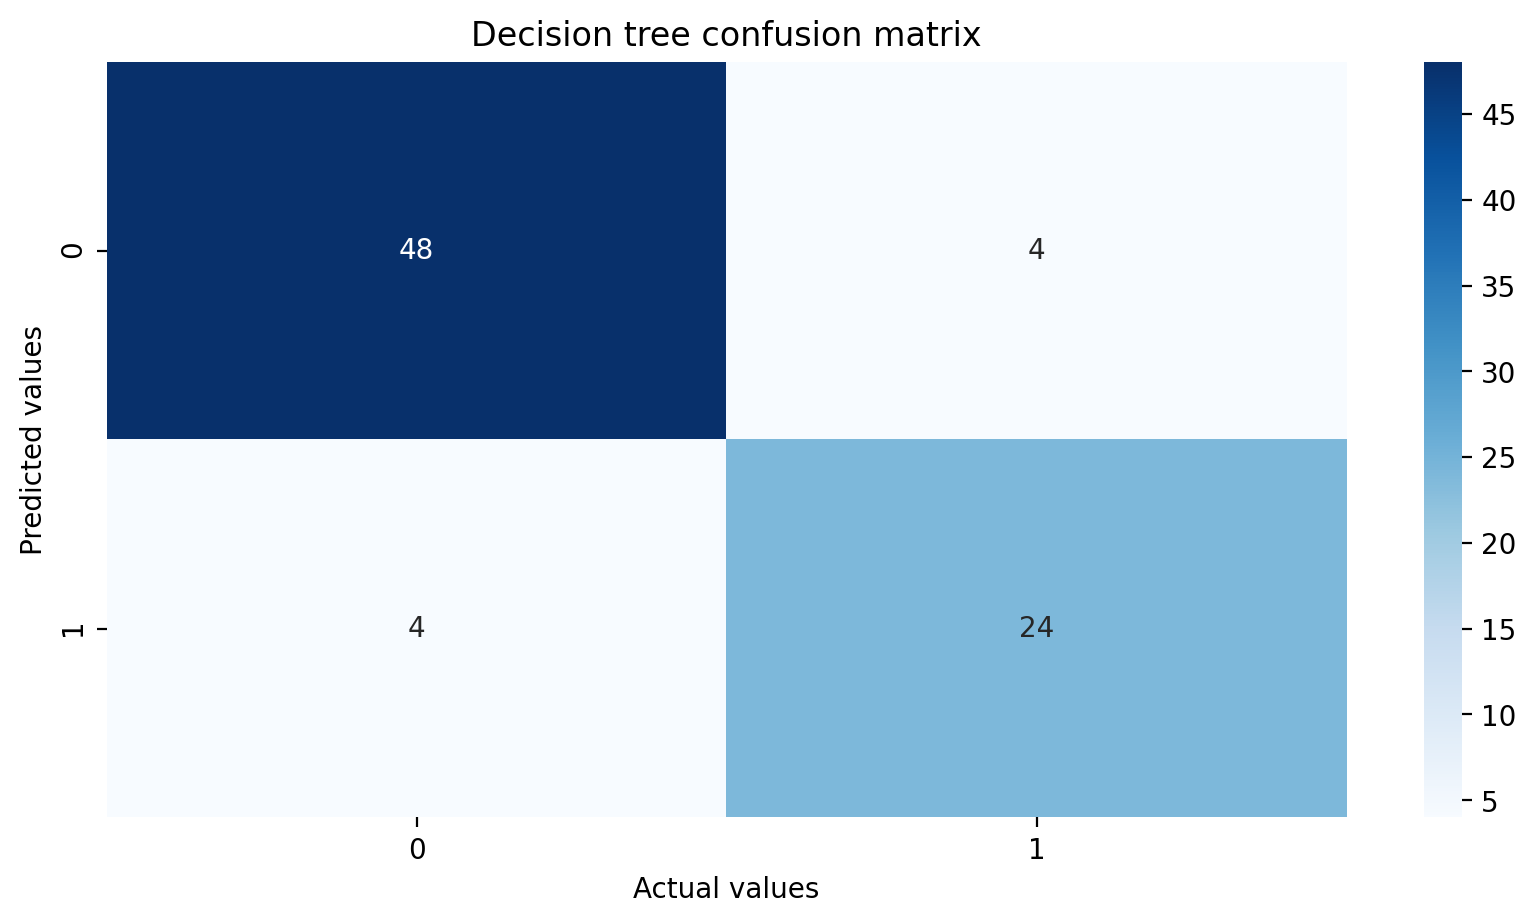

In [101]:
plt.figure(figsize=(10,5),dpi=200)
sns.heatmap(confusion_matrix_decision_tree, annot=True, cmap='Blues')
plt.title('Decision tree confusion matrix')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

# Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
random_forest=RandomForestClassifier(random_state=420)

In [104]:
hyperparameter_space_random_forest= {
    'n_estimators':[10,20,50,100,150,200,300,500,700,1000],
    'criterion':['gini','entropy'],
    'max_features':[1,2,3],
    'max_depth':[2,4,6,8,10,12],
    'min_samples_split':[2,3,4,6,7,8,9,10,20,50],
    'min_samples_leaf':[2,4,6,8,10]
     }

In [105]:
random_search_random_forest= RandomizedSearchCV(estimator=random_forest,
                                     param_distributions=hyperparameter_space_random_forest,
                                     n_iter=500,
                                     cv=5,
                                     scoring="accuracy",
                                     random_state=5,
                                     n_jobs=-1,
                                     verbose=1)
 

random_search_random_forest.fit(X_train,y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=420),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4, 6, 8, 10, 12],
                                        'max_features': [1, 2, 3],
                                        'min_samples_leaf': [2, 4, 6, 8, 10],
                                        'min_samples_split': [2, 3, 4, 6, 7, 8,
                                                              9, 10, 20, 50],
                                        'n_estimators': [10, 20, 50, 100, 150,
                                                         200, 300, 500, 700,
                                                         1000]},
                   random_state=5, scoring='accuracy', verbose=1)

In [106]:
random_search_random_forest.best_params_

{'n_estimators': 10,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 2,
 'max_depth': 2,
 'criterion': 'entropy'}

In [107]:
random_search_random_forest.best_score_

0.915625

### Building random forest with best random search cv params

In [108]:
random_forest_best_params=RandomForestClassifier(criterion='entropy',
                             max_depth=2,
                             max_features=2,
                             min_samples_leaf=4,
                             min_samples_split=4,
                             n_estimators=10,
                             random_state=1
                             )
random_forest_best_params.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=2, max_features=2,
                       min_samples_leaf=4, min_samples_split=4, n_estimators=10,
                       random_state=1)

In [109]:
random_forest_best_params_train_score=round(random_forest_best_params.score(X_train,y_train),2)
print('Random forest train set score:', random_forest_best_params_train_score)

Random forest train set score: 0.92


In [110]:
random_forest_best_params_test_score=round(random_forest_best_params.score(X_test,y_test),2)
print('Random forest test set score:', random_forest_best_params_test_score)

Random forest test set score: 0.91


### Random forest confusion matrix

In [111]:
random_forest_predicted=random_forest_best_params.predict(X_test)
random_forest_predicted

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [112]:
np.array(y_test)

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1])

In [113]:
from sklearn import metrics
confusion_matrix_random_forest = metrics.confusion_matrix(y_true=y_test,y_pred=random_forest_predicted,labels=(0,1))
confusion_matrix_random_forest

array([[47,  5],
       [ 2, 26]])

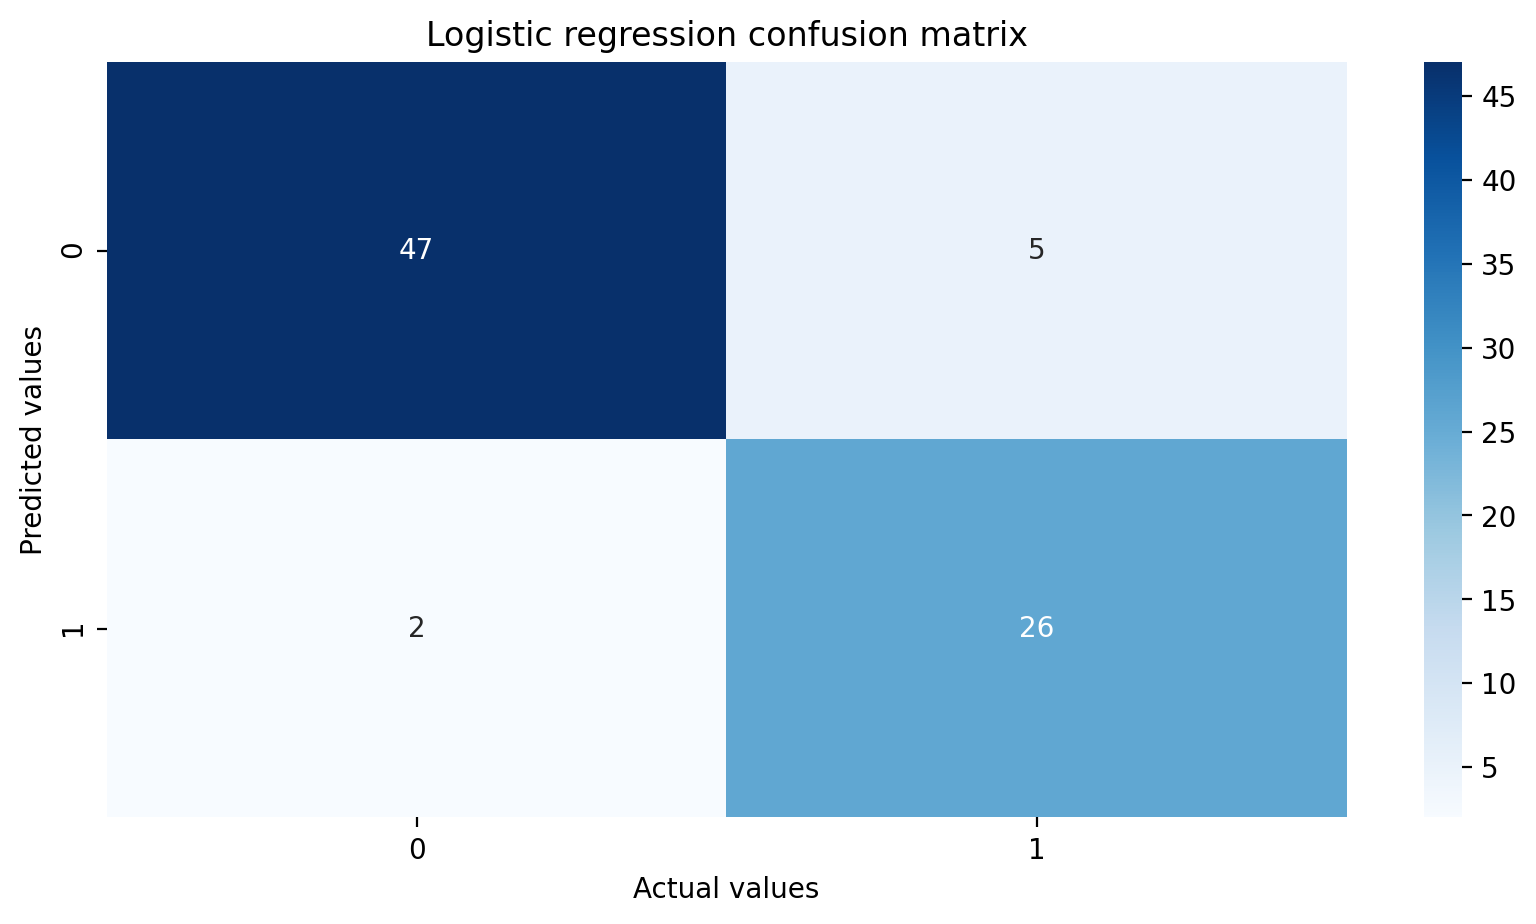

In [114]:
plt.figure(figsize=(10,5),dpi=200)
sns.heatmap(confusion_matrix_random_forest, annot=True, cmap='Blues')
plt.title('Logistic regression confusion matrix')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

# COMPARISION OF DIFFERENT MODELS

In [115]:
df_comparision=pd.DataFrame({'model':['logistic regression','decision tree', 'random forest'],
                             
                             'train_set_score':[logistic_regression_train_score,
                                                decision_tree_best_params_train_score,
                                                random_forest_best_params_train_score],
                             
                             'test_set_score':[logistic_regression_test_score,
                                               decision_tree_best_params_test_score,
                                               random_forest_best_params_test_score]
                                              
    
})

In [116]:
df_comparision

,model,train_set_score,test_set_score
0,logistic regression,0.64,0.65
1,decision tree,0.92,0.90
2,random forest,0.92,0.91
